In [0]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
from itertools import product
from scipy import optimize
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## Apply Neural Networks to Digits Dataset

- Experiment varying number of hidden units and depth. Plot test accuracy with increases in number of hidden units and depth. 
    
    
- Once you fix the best architecture, plot the learning curve for the training loss as you change the learning rate. (Hint: `mlp.loss_curve_`)
    - For this exercise, make sure the following hyperparameters that the: 
    `solver='sgd', momentum=0.0`. You can change the learning_rate with `learning_rate_init`. 
    
    
    
- Calculate the Hidden Layers for your dataset. Plot the histogram of the activations for different non-linearities (ReLU, Sigmoid, Tanh). What do the distributions look like?

In [0]:
# starter code 
digits = load_digits()

In [3]:
# find out what are in this digits Bunch (dictionary like object)
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
# How many occurences are there in each of the targets?
pd.Series(digits.target).value_counts()

3    183
5    182
1    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
dtype: int64

In [5]:
#How many data do we have?
len(digits.target)

1797

In [0]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

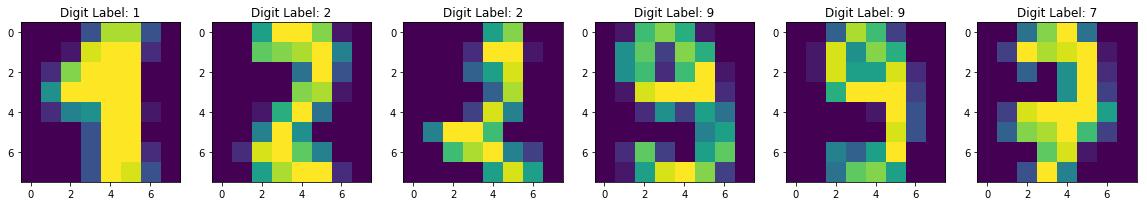

In [7]:
# let's visualize this data
viz_data = np.random.choice(range(X_train.shape[0]), 6)
fig = plt.figure(figsize=(20, 20))
for idx, img in enumerate(viz_data):
    fig.add_subplot(1, 6, idx+1)
    plt.imshow(X_train[img].reshape(8, 8))
    plt.title("Digit Label: {}".format(y_train[img]))

In [0]:
# normalizing the dataset 
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [9]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
print ("Logistic Regression Accuracy: {}".format(logit.score(X_test, y_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression Accuracy: 0.9444444444444444


In [0]:
# functions to test different hidden layers and learning rates
def train_mlp(units, activation='relu', sgd=False, lr=0.001, batch_size=200,loss_curve=False):
    
    mlp = MLPClassifier(hidden_layer_sizes=units, activation=activation)
    if sgd:
        mlp.set_params(solver='sgd', batch_size=batch_size, momentum=0.0, learning_rate_init=lr)
    
    mlp.fit(X_train, y_train)
    accuracy = mlp.score(X_test,y_test)
#     print(mlp.get_params())
    if loss_curve:
        return mlp.loss_curve_, accuracy
    
    return accuracy


def plot_hyper_param_plots(x, y, xlabel):
    best_x = x[np.argmax(y)]
    best_y = round(np.max(y), 2)
    plt.plot(x, y)
    plt.axvline(best_x, linestyle='dashed', color='red', 
                label= xlabel + ", {}, Test Accuracy: {}".format(best_x, best_y))
    plt.xlabel(xlabel)
    plt.ylabel('Test Accuracy')
    plt.legend()

### Investigate how many neurons in the hidden layers impacts accuracy

In [22]:
num_hidden_units = np.linspace(50, 1000, 10).astype('int')
all_test_accuracy = []
for units in num_hidden_units: 
    test_accuracy = train_mlp((units,))
    print ("Units: {}, Accuracy: {}".format(units, test_accuracy))
    all_test_accuracy.append(test_accuracy)

Units: 50, Accuracy: 0.9694444444444444
Units: 155, Accuracy: 0.9638888888888889
Units: 261, Accuracy: 0.9583333333333334
Units: 366, Accuracy: 0.9583333333333334
Units: 472, Accuracy: 0.9611111111111111
Units: 577, Accuracy: 0.9666666666666667
Units: 683, Accuracy: 0.9694444444444444
Units: 788, Accuracy: 0.9666666666666667
Units: 894, Accuracy: 0.9666666666666667
Units: 1000, Accuracy: 0.9638888888888889


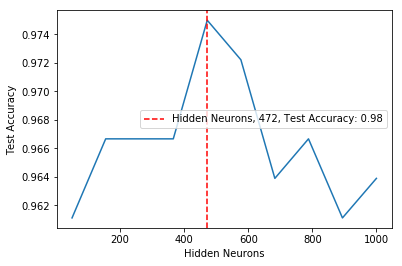

In [12]:
plot_hyper_param_plots(num_hidden_units, all_test_accuracy, 'Hidden Neurons')

Main Takeaway from this is that there is a saturating effect with increasing the hidden neurons (width) of the network especially for datasets that are quiet simple. When we blindly increase the width, we are unnecessarily increasing the complexity of our network, i.e. more parameters that we will need to store at test time, without a significant gain in generalization capacity.

### Investigate How Depth Impacts Generalization Capacity

In [13]:
best_units = num_hidden_units[np.argmax(all_test_accuracy)]
best_depths = []

for depth in range(1, 11):
    accuracy = train_mlp((best_units,)*depth)
    best_depths.append(accuracy)
    print ("Depth of the Network: {}, Test Accuracy: {}".format(depth, accuracy))

Depth of the Network: 1, Test Accuracy: 0.9666666666666667
Depth of the Network: 2, Test Accuracy: 0.9722222222222222
Depth of the Network: 3, Test Accuracy: 0.9638888888888889
Depth of the Network: 4, Test Accuracy: 0.9611111111111111
Depth of the Network: 5, Test Accuracy: 0.9611111111111111
Depth of the Network: 6, Test Accuracy: 0.9722222222222222
Depth of the Network: 7, Test Accuracy: 0.9694444444444444
Depth of the Network: 8, Test Accuracy: 0.9583333333333334
Depth of the Network: 9, Test Accuracy: 0.9611111111111111
Depth of the Network: 10, Test Accuracy: 0.9638888888888889


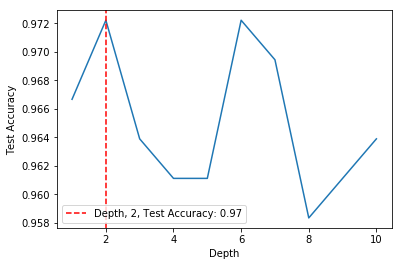

In [14]:
plot_hyper_param_plots(range(1, 11), best_depths, "Depth")

Main Takeaway: We see a small jump in accuracy due to increased depth but it is not statistically significant. (Note: In some iterations, it may not be true that depth increases accuracy). The main thing to note here is that Deep Neural Networks are not relevant to all problems. Their performance depends on the quality and complexity of the dataset.

### Investigating the Impact of Learning Rate on Convergence

In [0]:
learning_rates = np.linspace(0.001, 2, 12)
train_mlp_learning_rate = lambda lr: train_mlp((100,)*2, sgd=True, lr=lr, loss_curve=True)

In [0]:
lr_accs = map(train_mlp_learning_rate, learning_rates)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


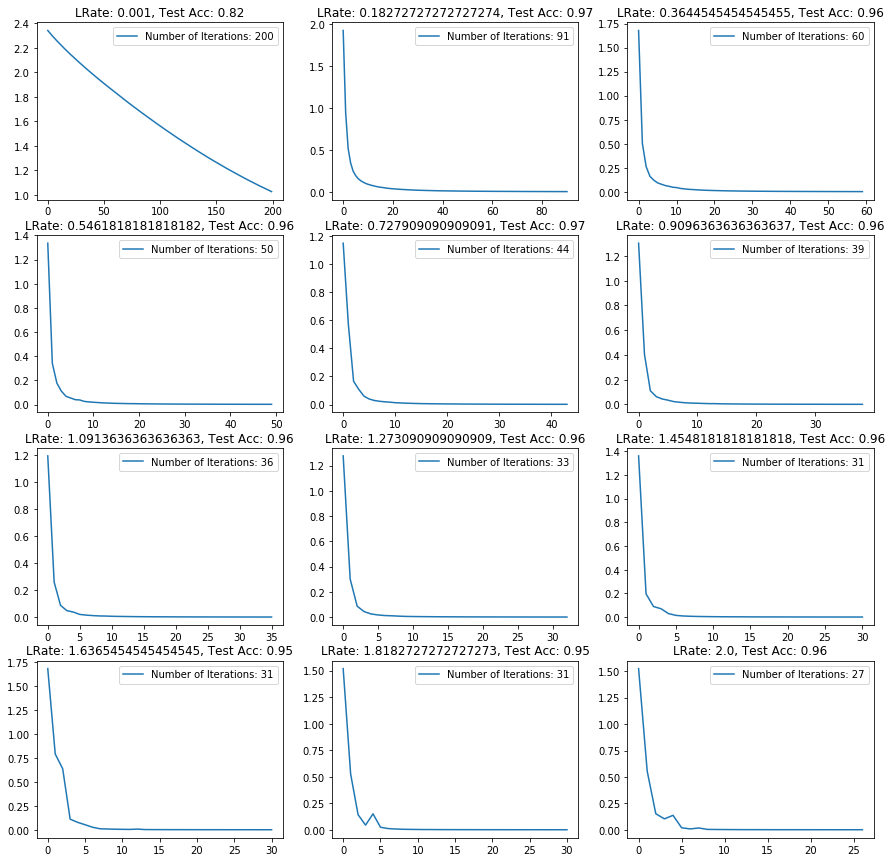

In [17]:
fig = plt.figure(figsize=(15, 15))
for idx, item in enumerate(zip(learning_rates, lr_accs)):
    learning_rate, loss_info = item
    loss_curve, acc = loss_info
    ax = fig.add_subplot(4, 3, idx+1)
    ax.plot(loss_curve, label='Number of Iterations: {}'.format(len(loss_curve)))
    ax.set_title("LRate: {}, Test Acc: {}".format(learning_rate, round(acc, 2)))
    ax.legend()

Main Takeaway: Learning Rates decrease the number of iterations it takes to get to low loss. However, this is a relatively straightforward dataset. For more complex problems, increased learning rate may lead to the network diverging.